# UNIT 1 CAPSTONE 


by: Melissa N 
Data: [Data Stories of US Airlines, 1987-2008](https://www.kaggle.com/prajitdatta/data-stories-of-us-airlines/data)

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Describe your dataset.

In this project, I will be studying a data set that contains informations about US Airlines during the year of 2008. 
The information provided is about the Departure and Arrival time of the trips taken by the different US Airlines companies. We also get information about the Departure and Arrival delays on the trips by US Carriers (reffered as UniqueCarrier in file).      
According to wikepedia, the ASPM records minutes of delay for five possible causes of flight arrival delays: carrier, weather, NAS, security, and late arrival. For instance in the data, weather delay which is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival is reffered as WeatherDelay in file. Delays that is within the control of the National Airspace System (NAS) reffered as NASDelay in file may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc..

In [25]:
df = pd.read_csv('airline_dec_2008_50k.csv', low_memory=False)
df.head() #Not using Print statement so that it displays all in one line for all tables 

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,2008,12,1,1,NaN,1000,NaN,1100,WN,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
1,2,2008,12,1,1,NaN,1000,NaN,1110,US,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
2,3,2008,12,1,1,NaN,1000,NaN,1125,MQ,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,12,1,1,NaN,1000,NaN,1227,EV,...,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
4,5,2008,12,1,1,NaN,1000,NaN,1227,NW,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN


In [26]:
df.tail()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
49995,49996,2008,12,13,6,805.0,810,900.0,904,YV,...,10.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
49996,49997,2008,12,13,6,805.0,810,906.0,916,CO,...,7.0,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
49997,49998,2008,12,13,6,805.0,810,925.0,940,WN,...,2.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
49998,49999,2008,12,13,6,805.0,810,938.0,945,AA,...,4.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
49999,50000,2008,12,13,6,806.0,800,935.0,935,MQ,...,9.0,15.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


To be able to have all the information that the data is providing, I will print the columns names. 

In [27]:
print(df.columns)

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


In order to make our study, I am going to look at all the carriers in the data and look at the trend the top 5 carriers with the most trips in the data have over time. Then I will look at their departure delays and see if there is anything we can glimpse from the data to reduce departure delays.

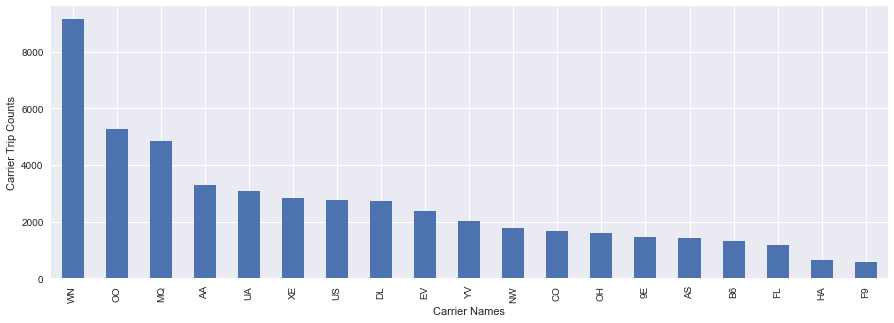

In [28]:
plt.figure(figsize=(15, 5))
df.UniqueCarrier.value_counts().head(20).plot(kind='bar')
plt.ylabel('Carrier Trip Counts')
plt.xlabel('Carrier Names')
plt.show()

In the figure above, we can see the 20 Carriers or US Airlines with the most trips in our data.  
The top 5 are WN (SouthWest Airlines), OO (SkyWest Airlines), MQ (American Eagle), AA (American Airlines) and UA (United Airlines).   
I am going to study their DepTime and ArrTime and see if I can notice a trend.  
I will do this over the Day of the month (DayofMonth) and the Day of the week (DayOfWeek).

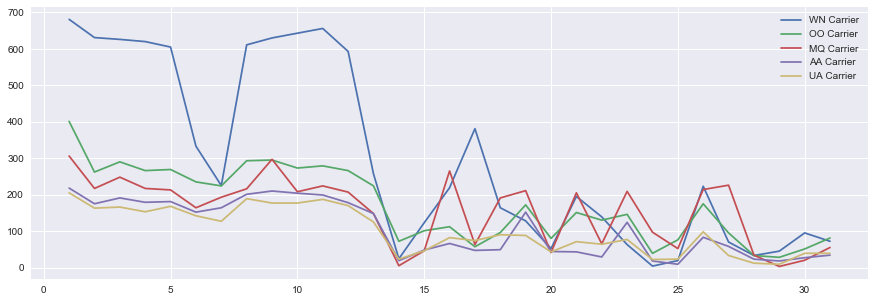

In [29]:
## To figure out trend of a Carrier over DayofMonth

WN = df[df['UniqueCarrier']=='WN']
OO = df[df['UniqueCarrier']=='OO']
MQ = df[df['UniqueCarrier']=='MQ']
AA = df[df['UniqueCarrier']=='AA']
UA = df[df['UniqueCarrier']=='UA']


plt.figure(figsize=(15, 5))
plt.plot(WN.DayofMonth.value_counts().sort_index(), label="WN Carrier")
plt.plot(OO.DayofMonth.value_counts().sort_index(), label="OO Carrier")
plt.plot(MQ.DayofMonth.value_counts().sort_index(), label="MQ Carrier")
plt.plot(AA.DayofMonth.value_counts().sort_index(), label="AA Carrier")
plt.plot(UA.DayofMonth.value_counts().sort_index(), label="UA Carrier")
plt.legend()
plt.show()

Looking at the SouthWest airlines (WN) curve, we notice a drastic drop around the 7th Day of the the month.  
This happens again around the 14th Day of the month and once again around the 20th Day of the Month. 
Also from the 20th Day of the month, all the top 5 carriers seem to have the same amount of Trips or a similar trends for the remaining days of the month.  

Looking at all the curves more closely, when we are looking at the trend over the Day of the week, we notice that  while once again Southwest airlines has the most trips recorded in the week, the drop around the 4th day of the week and the 6th day of the week isn't particulat to that company. Also for the 6th day of the week just like for the curve for the Day of the month, all of the top 5 companies tend to have the same amount of trips. This was true around 20th Day of the month for the Day of the Month curves.  

## The problem   

How to decrease the departure delays of the plane for United Airlines?

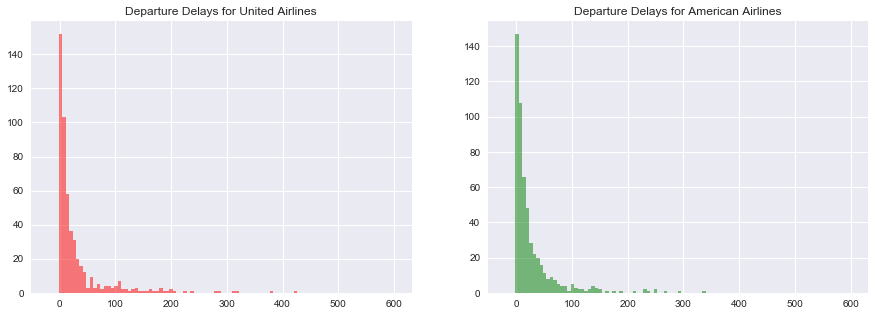

In [30]:

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist(UA['DepDelay'][UA['DepDelay'] > 0], range=(-20,600), bins=100, color='red', alpha = 0.5)
plt.title('Departure Delays for United Airlines')
plt.subplot(1, 2, 2)
plt.hist(AA['DepDelay'][AA['DepDelay'] > 0], range=(-20,600), bins=100, color='green', alpha = 0.5)
plt.title('Departure Delays for American Airlines')
plt.show()

Here we will be doing a comparison between the Departure Delays of Uniter Airlines and United Airlines. 
Looking at both companies, they have about the same amount of trips in a week but it looks like Departure Delays of American Airlines are a lot better than the ones from United Airlines. 

In [31]:
UA.DepDelay.describe()

count    2127.000000
mean        3.751763
std        29.599100
min       -21.000000
25%        -6.000000
50%        -3.000000
75%         0.000000
max       426.000000
Name: DepDelay, dtype: float64

In [32]:
AA.DepDelay.describe()

count    2282.000000
mean        3.383874
std        25.213040
min       -19.000000
25%        -5.000000
50%        -3.000000
75%         0.000000
max       335.000000
Name: DepDelay, dtype: float64

## The potential solution  

Reduce the departure time for United Airlines by 5 minutes or more if possible by having certain planes leaving 5 minutes or more before their departure dates.  

And compensate the flight crews that are able to achieve this. 

## The method of testing the solution   


Assign certain flight crews the goal of having their departure time be five minutes before their actual departure time. These flight crews are chosen at random by looking at the 2nd letter of the pilot Last Name. 
Do it fo 30% of the Flight crews in United Airlines with a 2nd letter being a vowel.  
Record their departure delay if any.   

The variable of interest is the departure delay for Flights with Test Group versus the one from Control Group.

This is an A/B Testing where Earlier departure time is Assigned or not Assigned.  


We will record the Departure Delays for two months during the study and compare the ones from the Test and Control group to each other .   


If Departure Delay in the next two months decreases by 10% among Test group, conclude that Assigning Early departure for certain flights is effective and require it for all flights in United Airlines.   

If Departure Delays in the next two months decreases among Test Group, but by less than one standard deviation, observe for two more months before deciding.    


If Departure Delays  between the Test group isn't better in comparison to the control group in two months, Stop the experiment.


## Before Rollout 

Success Metric: Reduction of Departure Delays between Test and Control Group.


Secondary Metric: Reduction of Arrival Delays (that is because having certain plane leaving early can lead to them arriving earlier. 

In [35]:
 ## selecting the columns I want to work with, and assigning them to a new df called Flights.

Flights = df[['Year', 'Month', 'DepTime','ArrTime', 'UniqueCarrier', 'FlightNum','AirTime', 'ArrDelay', 'DepDelay']]

#  The DepTime, ArrTime, ArrDelay, DepDelay column has a lot of NAN values. 
#I just want NAN in those files to be 0.0. 

Flights.DepDelay.fillna(0.0)

newDTime = Flights['DepTime'].fillna(0.0)
Flights['DepTime'] = newDTime
newATime = Flights['ArrTime'].fillna(0.0)
Flights['ArrTime'] = newATime
newADelay = Flights['ArrDelay'].fillna(0.0)
Flights['ArrDelay'] = newADelay
newDDelay = Flights['DepDelay'].fillna(0.0)
Flights['DepDelay'] = newDDelay
newAirTime = Flights['AirTime'].fillna(0.0)
Flights['AirTime'] = newAirTime


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

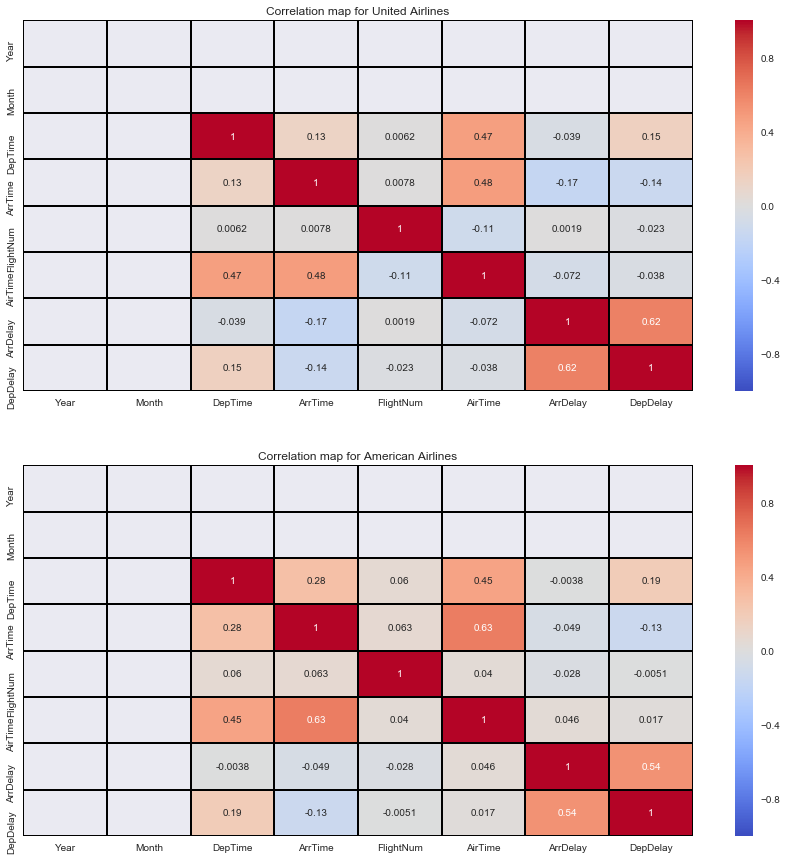

In [36]:
#siince planning to study AA and UA Flights 

AAFlights = Flights[Flights['UniqueCarrier']=='AA']
UAFlights = Flights[Flights['UniqueCarrier']=='UA']

# Now, using a heat map we can see which columns have a strongest corrilation to eachother. This is a perfect way to see,
# what columns strongly affect DepDelay


plt.figure(figsize=(15, 15))
plt.subplot(2, 1, 1)
sns.heatmap(UAFlights.corr(), cmap='coolwarm', linecolor='black', linewidths=1, annot=True)
plt.title('Correlation map for United Airlines')
plt.subplot(2, 1, 2)
sns.heatmap(AAFlights.corr(), cmap='coolwarm', linecolor='black', linewidths=1, annot=True)
plt.title('Correlation map for American Airlines')
plt.show()

From the heat Map with corrolation, it looks like DepTime, ArrDelay are the colums that affect DepDelay the most. 
Which means that looking at Arrival Delay as our second metric is a good choice 

Other Things to do: Check if there is any potemtial collision with other things to do

WeatherDelay  
NASDelay  
SecurityDelay    
LateAircraftDelay
